# COURSE 5 / ENSEMBLE MODELLING / PROJECT

## Importing Libraries

In [1]:
# Importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
data = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

## Exploring the dataset

In [3]:
# Finding the shape of the dataset
data.shape

(729322, 11)

In [4]:
# Viewing the first 5 rows
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
# Checking for missing values
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
# Checking the datatype of the variables
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

## Feature Creation

In [7]:
# Converting datetime variables which are in object form to datetime datatype

data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [8]:
# Creating features based on month

data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [9]:
# Creating features based on the day of week

data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday

In [10]:
# Creating features based on hour of the day

data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour


In [11]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2,2,0,0,16,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,3,3,4,4,23,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2,2,6,6,17,18
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,1,1,1,9,10
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,2,2,2,6,6


In [12]:
data = data.drop(columns=['id','pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)

In [13]:
# Converting all categorical variables into integer
data = pd.get_dummies(data)

In [14]:
data.head()

,vendor_id,passenger_count,trip_duration,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,400,2,2,0,0,16,16,1,0
1,1,2,1100,3,3,4,4,23,23,1,0
2,2,2,1635,2,2,6,6,17,18,1,0
3,2,6,1141,1,1,1,1,9,10,1,0
4,1,1,848,2,2,2,2,6,6,1,0


In [15]:
data.dtypes

vendor_id               int64
passenger_count         int64
trip_duration           int64
pickup_month            int64
dropoff_month           int64
pickup_day_no           int64
dropoff_day_no          int64
pickup_hour             int64
dropoff_hour            int64
store_and_fwd_flag_N    uint8
store_and_fwd_flag_Y    uint8
dtype: object

## We have converted all categorical variables into numeric variables for model building

## Seperating the features and target variable

In [16]:
# Seperating independent and dependent variables

x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((729322, 10), (729322,))

In [17]:
# Importing Train test split

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state=101, shuffle=False)

## We have created 4 datasets for model building and evaluation..

## Now, we have to import all the desired models from sklearn.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## 1. Random Forest Model

In [19]:
model3 = RandomForestRegressor(random_state=96)
model3.fit(train_x,train_y)
pred3=model3.predict(test_x)
pred3[:10], model3.score(test_x, test_y)

(array([1284.20616809, 1201.83464413, 1157.86671104,  580.55084646,
         702.11834884,  776.89930487,  747.21454274,  687.3008526 ,
         719.52412762, 1345.47238554]),
 0.9149387960368525)

## 2. Gradient Boosting Model

In [20]:
model4=GradientBoostingRegressor(random_state=96)
model4.fit(train_x,train_y)
pred4=model4.predict(test_x)
pred4[:10], model4.score(test_x,test_y)

(array([900.1011176 , 681.73434476, 887.78803134, 944.3153209 ,
        946.99806986, 980.50608921, 915.10456319, 877.40553052,
        721.48990682, 856.00787196]),
 -0.0813015826255945)

## For distance based algorithms, we need to standardise the values. 

In [21]:
# Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [22]:
# Converting back into a dataframe
x = pd.DataFrame(x_scaled)

## 3. Knn Model

In [23]:
model1=KNeighborsRegressor()
model1.fit(train_x,train_y)
pred1=model1.predict(test_x)
pred1[:10], model1.score(test_x,test_y)

(array([1270.4, 1024. , 1206. ,  392.2, 1087.6,  744.6, 1174.2, 1226.8,
         856.2, 1648.4]),
 -0.11728137925788618)

## 4. Linear Regression Model

In [24]:
model2=LinearRegression()
model2.fit(train_x,train_y)
pred2=model2.predict(test_x)
pred2[:10], model2.score(test_x,test_y)

(array([ 871.11711709,  862.68638592,  854.27872535, 1046.91777139,
        1051.90948173, 1013.7269324 ,  818.65352028,  777.20726788,
         859.06894815,  792.35231899]),
 0.00014600173021894758)

## Ensembling the four models using Averaging

In [25]:
from statistics import mean
final_pred = np.array([])
for i in range(0,len(test_x)):
    final_pred = np.append(final_pred, mean([pred1[i], pred2[i], pred3[i], pred4[i]]))

## Testing the score of the final prediction with the actual test data

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(test_y,final_pred)

0.48284519887400945

In [28]:
r2_score(test_y, pred1), r2_score(test_y, pred2), r2_score(test_y, pred3), r2_score(test_y,pred4)

(-0.11728137925788618,
 0.00014600173021894758,
 0.9149387960368525,
 -0.0813015826255945)

## The final score of the ensembled model is the average of the four individual models. 

## The final ensembled score is found to be 0.48284519887400945

## Elbow curve for finding the best value of k

In [29]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.111111,0.2,0.166667,0.000000,0.000000,0.695652,0.695652,1.0,0.0
1,0.0,0.222222,0.4,0.333333,0.666667,0.666667,1.000000,1.000000,1.0,0.0
2,1.0,0.222222,0.2,0.166667,1.000000,1.000000,0.739130,0.782609,1.0,0.0
3,1.0,0.666667,0.0,0.000000,0.166667,0.166667,0.391304,0.434783,1.0,0.0
4,0.0,0.111111,0.2,0.166667,0.333333,0.333333,0.260870,0.260870,1.0,0.0


In [30]:
y.head()

0     400
1    1100
2    1635
3    1141
4     848
Name: trip_duration, dtype: int64

In [31]:
# Importing KNN regressor
from sklearn.neighbors import KNeighborsRegressor as KNN

# Importing MSE metric for evaluation
from sklearn.metrics import mean_squared_error as mse


In [32]:
# Defining a function to train the data for different values of k
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [33]:
#Defining K range
k = range(1,40)

In [34]:
# Calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

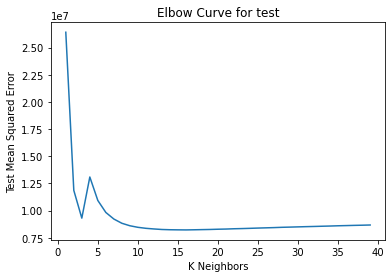

In [35]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

## From the elbow curve, at k=8 the error seems to be the minimum. Therefore, the best value of k = 8

## Let's see the impact of Regularization on the Linear regression model

## Importing the Ridge and Lasso Regularization

In [38]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## Building the Regularized Ridge model

In [39]:
model5= Ridge (alpha = 0.3)
model5.fit(train_x,train_y)
pred5=model5.predict(test_x)
pred5[:10], model5.score(test_x,test_y)


(array([ 871.07917826,  862.65209732,  854.22833264, 1046.94440914,
        1051.93261496, 1013.74448917,  818.66749663,  777.21204014,
         859.09240869,  792.29603355]),
 0.00017020182932303562)

## Building the Regularized Lasso model

In [40]:
model6= Lasso (alpha = 0.1)
model6.fit(train_x,train_y)
pred6=model6.predict(test_x)
pred6[:10], model6.score(test_x,test_y)


(array([ 861.89119707,  855.36548233,  839.78976674, 1055.6833798 ,
        1058.84247277, 1018.19044241,  822.52105114,  776.75912816,
         867.36753426,  774.50184391]),
 0.00040794171796509904)

## Replacing the Linear Regression Model with Ridge Regularization and checking the Average Ensembling.

In [45]:
r2_score(test_y, pred1), r2_score(test_y, pred5), r2_score(test_y, pred3), r2_score(test_y,pred4)

(-0.11728137925788618,
 0.00017020182932303562,
 0.9149387960368525,
 -0.0813015826255945)

In [46]:
from statistics import mean
final_pred = np.array([])
for i in range(0,len(test_x)):
    final_pred = np.append(final_pred, mean([pred1[i], pred5[i], pred3[i], pred4[i]]))

In [47]:
r2_score(test_y,final_pred)

0.48284540694056177

## The final ensembled score by implementing Ridge regularization is 0.48284540694056177

## Replacing the Linear Regression Model with Lasso Regularization and checking Average Ensembling.

In [48]:
r2_score(test_y, pred1), r2_score(test_y, pred6), r2_score(test_y, pred3), r2_score(test_y,pred4)

(-0.11728137925788618,
 0.00040794171796509904,
 0.9149387960368525,
 -0.0813015826255945)

In [49]:
from statistics import mean
final_pred = np.array([])
for i in range(0,len(test_x)):
    final_pred = np.append(final_pred, mean([pred1[i], pred6[i], pred3[i], pred4[i]]))

In [50]:
r2_score(test_y,final_pred)

0.48249280262081873

## The final ensembled score by implementing Lasso regularization is 0.48249280262081873

## From the test scores, it is obvious that both the regularization methods have not improved the Model visibly.